In [1]:
%load_ext autoreload
%autoreload 2

from gninvert.nn import GeneralLinearFullNet
import torch as t
import math
import matplotlib.pyplot as plt
from gninvert.hyperparamsearch import hpsearch
from gninvert.data_generation import TrainingData


In [3]:
glfn = GeneralLinearFullNet(2, 2, [10],
                            t.nn.GELU, True)

In [4]:
glfn.layers

ModuleList(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): GELU()
  (2): Linear(in_features=10, out_features=2, bias=True)
  (3): GELU()
)

In [5]:
x = t.tensor([1., 1.])

In [6]:
glfn.forward(x)

tensor([0.0161, 0.2336], grad_fn=<GeluBackward0>)

In [7]:
glfn

GeneralLinearFullNet(
  (layers): ModuleList(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): GELU()
    (2): Linear(in_features=10, out_features=2, bias=True)
    (3): GELU()
  )
)

In [8]:
t.nn.ReLU

torch.nn.modules.activation.ReLU

In [18]:
params = {
    'starting_lr': [0.1],
    'lr_scheduler_dec_factor': [0.2],
    'lr_scheduler_patience': [30],
    'lr_scheduler_cooldown': [30],
    'batch_size': [128],
    'optimizer': ['adam', 'sgd'],
    'adam_weight_decay': [1e-6],
    'momentum': [1e-4],
    'epochs': [1000],
    'loss_func': [t.nn.MSELoss()],
    1: [1],
    2: [1],
    3: [[8]],
    4: [t.nn.GELU, t.nn.ReLU],
    5: [True, False]
}

In [19]:
xs = t.arange(0.1, 1, 0.005)[1:].unsqueeze(dim=-1)
ys = 1 / xs
tdata = TrainingData(xs, ys, shuffle=True, shuffle_seed = 42)
tdata

<gninvert.data_generation.TrainingData, 134 train size / 45 validation size / shuffle True>

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

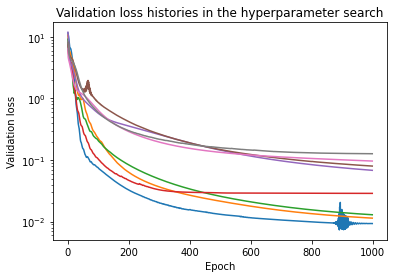

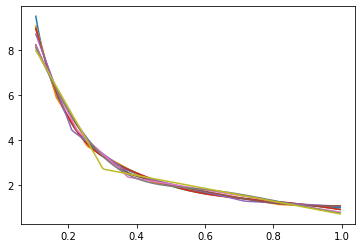

In [20]:
results = hpsearch(
    params,
    GeneralLinearFullNet,
    training_data = tdata,
    verbose = True
)
plt.show()
plt.plot(xs, ys)
for r in results:
    plt.plot(xs, r['model'](xs).detach().clone())